# Breakdown the Data into Smaller Sets

Separate the data by different criteria so that can load and work with in more manageable dataframes

In [1]:
import pandas as pd
import s3fs 
import boto3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from io import StringIO 

In [3]:
s3_resource = boto3.resource('s3')

# Load the Data

In [3]:
df = pd.read_csv('s3://script.chargepoint.data/clean/intervals_clean.csv')

In [4]:
df

,Interval ID,Session ID,Interval Start Time (Local),Interval Duration (Secs),Interval Energy,Peak Power,Average Power
0,751891049,26149711,2015-05-03 22:15:53.0,847,1.299573,5.7168,5.5236
1,751891051,26149711,2015-05-03 22:30:00.0,900,1.429704,5.7303,5.7188
2,751891053,26149711,2015-05-03 22:45:00.0,900,1.433953,5.7517,5.7358
3,751891055,26149711,2015-05-03 23:00:00.0,900,1.430786,5.7322,5.7231
4,751891057,26149711,2015-05-03 23:15:00.0,900,1.432505,5.7328,5.7300
5,751891059,26149711,2015-05-03 23:30:00.0,900,1.417413,5.7338,5.6697
6,751891061,26149711,2015-05-03 23:45:00.0,900,0.911500,5.0972,3.6460
7,751891063,26149711,2015-05-04 00:00:00.0,900,0.464272,2.5260,1.8571
8,751891065,26149711,2015-05-04 00:15:00.0,900,0.188865,1.3999,0.7555
9,751912503,26167547,2015-05-04 09:28:20.0,100,0.104399,5.0150,3.7584


In [5]:
df.shape

(130857092, 7)

In [4]:
df1 = pd.read_csv('s3://script.chargepoint.data/clean/intervals_paired.csv')
df1

,Interval ID,Session ID,Interval Start Time (Local),Interval Duration (Secs),Interval Energy,Peak Power,Average Power
0,751891049,26149711,2015-05-03 22:15:53.0,847,1.299573,5.7168,5.5236
1,751891051,26149711,2015-05-03 22:30:00.0,900,1.429704,5.7303,5.7188
2,751891053,26149711,2015-05-03 22:45:00.0,900,1.433953,5.7517,5.7358
3,751891055,26149711,2015-05-03 23:00:00.0,900,1.430786,5.7322,5.7231
4,751891057,26149711,2015-05-03 23:15:00.0,900,1.432505,5.7328,5.7300
5,751891059,26149711,2015-05-03 23:30:00.0,900,1.417413,5.7338,5.6697
6,751891061,26149711,2015-05-03 23:45:00.0,900,0.911500,5.0972,3.6460
7,751891063,26149711,2015-05-04 00:00:00.0,900,0.464272,2.5260,1.8571
8,751891065,26149711,2015-05-04 00:15:00.0,900,0.188865,1.3999,0.7555
9,751912503,26167547,2015-05-04 09:28:20.0,100,0.104399,5.0150,3.7584


In [57]:
df1.shape

(128283610, 7)

In [6]:
df2 = pd.read_csv('s3://script.chargepoint.data/clean/sessions_paired.csv')
df2

,Session ID,Station ID,Port ID,Connector Type,POI Category,POI Subcategory,Session Time Zone,Session Time (secs),Charging Time (secs),Start SoC,...,Driver Country,Max Power,Session Type,Vehicle Model Year,start_datetime,start_seconds,start_year,start_month,start_day,start_weekday
0,99999951,155805,208243.0,J1772,Parking,Commercial,PDT,4143,4130,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:50:12,49812,2017,9,264,3
1,99999911,127071,166451.0,J1772,Workplace,High-Tech,PDT,14104,10440,NaN,...,United States,6.6,OTHER,2017.0,2017-09-21 13:15:01,47701,2017,9,264,3
2,99999881,143745,191547.0,J1772,Workplace,General,PDT,4364,1328,NaN,...,United States,6.6,OTHER,2013.0,2017-09-21 13:50:13,49813,2017,9,264,3
3,99999861,78433,195605.0,J1772,Workplace,General,PDT,9818,9811,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:50:11,49811,2017,9,264,3
4,99999851,93629,105187.0,J1772,Workplace,General,PDT,7165,6849,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:50:14,49814,2017,9,264,3
5,99999761,187543,253063.0,J1772,Workplace,General,PDT,9816,9805,NaN,...,United States,6.6,OTHER,2016.0,2017-09-21 13:49:57,49797,2017,9,264,3
6,99999741,145785,194419.0,J1772,Workplace,General,PDT,11520,2021,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:49:56,49796,2017,9,264,3
7,99999691,205681,277751.0,J1772,Workplace,General,PDT,6626,6200,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:49:55,49795,2017,9,264,3
8,99999631,132311,174233.0,J1772,Workplace,High-Tech,PDT,9761,6903,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:49:31,49771,2017,9,264,3
9,99999581,88527,137541.0,J1772,Workplace,General,PDT,10924,10638,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:49:32,49772,2017,9,264,3


In [8]:
df2.shape

(11719337, 38)

# Explore the DataFrames a Bit

In [16]:
print(min(df2['start_day'].values))
print(max(df2['start_day'].values))

1
366


In [17]:
df2.columns

Index(['Session ID', 'Station ID', 'Port ID', 'Connector Type', 'POI Category',
       'POI Subcategory', 'Session Time Zone', 'Session Time (secs)',
       'Charging Time (secs)', 'Start SoC', 'End SoC', 'Full Charge',
       'Energy (kWh)', 'Driver ID', 'Driver Zip', 'Vehicle Make',
       'Vehicle Model', 'Battery Capacity', 'EV Type', '$ Fee', 'Fee Currency',
       'Zip Code', 'City', 'County', 'State', 'Country', 'Driver City',
       'Driver State', 'Driver Country', 'Max Power', 'Session Type',
       'Vehicle Model Year', 'start_datetime', 'start_seconds', 'start_year',
       'start_month', 'start_day', 'start_weekday'],
      dtype='object')

In [23]:
df2.iloc[1]

Session ID                         99999911
Station ID                           127071
Port ID                              166451
Connector Type                        J1772
POI Category                      Workplace
POI Subcategory                   High-Tech
Session Time Zone                       PDT
Session Time (secs)                   14104
Charging Time (secs)                  10440
Start SoC                               NaN
End SoC                                 NaN
Full Charge                            True
Energy (kWh)                        9.13487
Driver ID                            688659
Driver Zip                            95070
Vehicle Make                      Chevrolet
Vehicle Model                          Volt
Battery Capacity                       14.4
EV Type                                 NaN
$ Fee                                  1.96
Fee Currency                            USD
Zip Code                              94089
City                            

In [26]:
prof = df[df['Session ID'] == df2.iloc[1][0]]

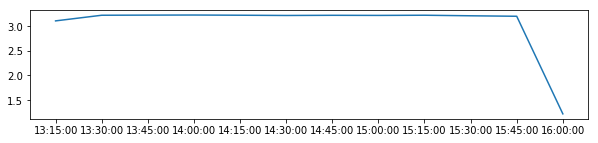

In [42]:
plt.figure(figsize=(10,2))
times = [entry[11:-2] for entry in prof['Interval Start Time (Local)'].values]
plt.plot(times, prof['Average Power'])
plt.show()
# prof


# Separate the DataFrames

### Save zipcodes only

In [67]:
df3 = df2[['Session ID', 'Zip Code', 'Driver Zip']]

In [70]:
csv_buffer = StringIO()
df3.to_csv(csv_buffer, index=False)
bucket = 'script.chargepoint.data'
s3_resource.Object(bucket, 'zipcodes_only.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '9867DCA979BB1470',
  'HostId': '0Yil7K2NwBwmvqeWdFiIS0DYMpXxxsGo8TvUoTONZZY3dlAYV6kCMWw4zNY2/nqoNpZGfRAcvE0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '0Yil7K2NwBwmvqeWdFiIS0DYMpXxxsGo8TvUoTONZZY3dlAYV6kCMWw4zNY2/nqoNpZGfRAcvE0=',
   'x-amz-request-id': '9867DCA979BB1470',
   'date': 'Tue, 25 Jun 2019 16:39:00 GMT',
   'etag': '"897c857f965098ee0144316c208cea1b"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"897c857f965098ee0144316c208cea1b"'}

In [72]:
check = pd.read_csv('s3://script.chargepoint.data/zipcodes_only.csv')
check

,Session ID,Zip Code,Driver Zip
0,99999951,95054,95135
1,99999911,94089,95070
2,99999881,94043,94086
3,99999861,95054,94555
4,99999851,95134,95127
5,99999761,95035,95148
6,99999741,95014,95129
7,99999691,94085,94566
8,99999631,94304,94089
9,99999581,95014,95032


### Save separately for each zipcode

In [7]:
zips = list(set(df2['Zip Code'].values))

In [8]:
len(zips)

229

In [73]:
bucket = 'script.chargepoint.data'
ct = 0
for onezip in zips:
    print('On zip code ',onezip, ' which is number ',ct, ' of ',len(zips))
    df3 = df2.loc[df2['Zip Code']==onezip]
    df4 = df1[df1['Session ID'].isin(df3['Session ID'].values)]
    str1 = 'evsezip'+str(onezip)

    csv_buffer = StringIO()
    df3.to_csv(csv_buffer, index=False)
    key3 = str1+'_sessions.csv'
    s3_resource.Object(bucket, key3).put(Body=csv_buffer.getvalue())
    
    csv_buffer = StringIO()
    df4.to_csv(csv_buffer, index=False)
    key4 = str1+'_intervals.csv'
    s3_resource.Object(bucket, key4).put(Body=csv_buffer.getvalue())
    
    ct += 1
    

On zip code  94720  which is number  0  of  229
On zip code  94541  which is number  1  of  229
On zip code  95758  which is number  2  of  229
On zip code  95126  which is number  3  of  229
On zip code  95053  which is number  4  of  229
On zip code  94618  which is number  5  of  229
On zip code  94547  which is number  6  of  229
On zip code  92211  which is number  7  of  229
On zip code  91706  which is number  8  of  229
On zip code  94619  which is number  9  of  229
On zip code  91204  which is number  10  of  229
On zip code  94801  which is number  11  of  229
On zip code  94804  which is number  12  of  229
On zip code  94806  which is number  13  of  229
On zip code  94301  which is number  14  of  229
On zip code  94303  which is number  15  of  229
On zip code  94304  which is number  16  of  229
On zip code  94305  which is number  17  of  229
On zip code  94306  which is number  18  of  229
On zip code  95129  which is number  19  of  229
On zip code  90220  which is n

EndpointConnectionError: Could not connect to the endpoint URL: "https://s3.us-west-1.amazonaws.com/script.chargepoint.data/evsezip94080_intervals.csv"

In [76]:
ct = 156
for onezip in zips[156:]:
    print('On zip code ',onezip, ' which is number ',ct, ' of ',len(zips))
    df3 = df2.loc[df2['Zip Code']==onezip]
    df4 = df1[df1['Session ID'].isin(df3['Session ID'].values)]
    str1 = 'evsezip'+str(onezip)

    csv_buffer = StringIO()
    df3.to_csv(csv_buffer, index=False)
    key3 = str1+'_sessions.csv'
    s3_resource.Object(bucket, key3).put(Body=csv_buffer.getvalue())
    
    csv_buffer = StringIO()
    df4.to_csv(csv_buffer, index=False)
    key4 = str1+'_intervals.csv'
    s3_resource.Object(bucket, key4).put(Body=csv_buffer.getvalue())
    
    ct += 1

On zip code  94080  which is number  156  of  229
On zip code  94592  which is number  157  of  229
On zip code  94614  which is number  158  of  229
On zip code  94589  which is number  159  of  229
On zip code  94596  which is number  160  of  229
On zip code  94085  which is number  161  of  229
On zip code  94597  which is number  162  of  229


EndpointConnectionError: Could not connect to the endpoint URL: "https://s3.us-west-1.amazonaws.com/script.chargepoint.data/evsezip94597_sessions.csv"

In [77]:
ct = 162
for onezip in zips[162:]:
    print('On zip code ',onezip, ' which is number ',ct, ' of ',len(zips))
    df3 = df2.loc[df2['Zip Code']==onezip]
    df4 = df1[df1['Session ID'].isin(df3['Session ID'].values)]
    str1 = 'evsezip'+str(onezip)

    csv_buffer = StringIO()
    df3.to_csv(csv_buffer, index=False)
    key3 = str1+'_sessions.csv'
    s3_resource.Object(bucket, key3).put(Body=csv_buffer.getvalue())
    
    csv_buffer = StringIO()
    df4.to_csv(csv_buffer, index=False)
    key4 = str1+'_intervals.csv'
    s3_resource.Object(bucket, key4).put(Body=csv_buffer.getvalue())
    
    ct += 1

On zip code  94597  which is number  162  of  229
On zip code  94086  which is number  163  of  229
On zip code  94598  which is number  164  of  229
On zip code  94089  which is number  165  of  229
On zip code  95110  which is number  166  of  229
On zip code  95113  which is number  167  of  229
On zip code  94601  which is number  168  of  229
On zip code  95117  which is number  169  of  229
On zip code  95112  which is number  170  of  229
On zip code  94607  which is number  171  of  229
On zip code  95119  which is number  172  of  229
On zip code  94608  which is number  173  of  229
On zip code  94609  which is number  174  of  229
On zip code  95122  which is number  175  of  229
On zip code  94612  which is number  176  of  229
On zip code  95124  which is number  177  of  229
On zip code  95125  which is number  178  of  229
On zip code  94103  which is number  179  of  229
On zip code  95128  which is number  180  of  229
On zip code  94105  which is number  181  of  229


## By type

In [9]:
types_list = list(set(df2['POI Category'].values))

In [10]:
list(set(df2['POI Category'].values))

['Multifamily Commercial',
 'Government (Fed, State)',
 'Multifamily Home Service',
 'Utility',
 'Parks and Recreation',
 'Healthcare',
 'Workplace',
 'Municipal',
 'Fleet',
 'Retail',
 'Parking',
 'Hospitality',
 'Education']

In [80]:
df2.loc[df2['POI Category'] == 'Healthcare']

,Session ID,Station ID,Port ID,Connector Type,POI Category,POI Subcategory,Session Time Zone,Session Time (secs),Charging Time (secs),Start SoC,...,Driver Country,Max Power,Session Type,Vehicle Model Year,start_datetime,start_seconds,start_year,start_month,start_day,start_weekday
197,99991731,94807,107385.0,J1772,Healthcare,Hospital / Treatment Center,PDT,18595,17797,NaN,...,United States,6.6,OTHER,2017.0,2017-09-21 13:37:26,49046,2017,9,264,3
382,99984811,211403,286697.0,J1772,Healthcare,Hospital / Treatment Center,PDT,9876,9866,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:28:15,48495,2017,9,264,3
524,99980061,10506,34773.0,J1772,Healthcare,Hospital / Treatment Center,PDT,12483,10265,NaN,...,United States,6.6,OTHER,2015.0,2017-09-21 13:21:51,48111,2017,9,264,3
531,99979781,99951,116233.0,J1772,Healthcare,Hospital / Treatment Center,PDT,15790,9012,NaN,...,United States,6.6,OTHER,2016.0,2017-09-21 13:21:13,48073,2017,9,264,3
542,99979521,182341,245587.0,J1772,Healthcare,Hospital / Treatment Center,PDT,7785,7740,NaN,...,United States,6.6,OTHER,2013.0,2017-09-21 13:20:38,48038,2017,9,264,3
560,99978981,128661,169253.0,J1772,Healthcare,Hospital / Treatment Center,PDT,8847,8817,NaN,...,United States,6.6,OTHER,2016.0,2017-09-21 13:19:38,47978,2017,9,264,3
688,99974211,211403,286695.0,J1772,Healthcare,Hospital / Treatment Center,PDT,10477,5800,NaN,...,United States,6.6,OTHER,2017.0,2017-09-21 13:14:02,47642,2017,9,264,3
746,99971991,123613,219609.0,J1772,Healthcare,Hospital / Treatment Center,PDT,30765,6355,NaN,...,United States,6.6,OTHER,2017.0,2017-09-21 13:10:57,47457,2017,9,264,3
891,99966731,28553,203701.0,J1772,Healthcare,Hospital / Treatment Center,PDT,3948,254,NaN,...,United States,6.6,OTHER,2016.0,2017-09-21 13:04:43,47083,2017,9,264,3
897,99966561,124171,161713.0,J1772,Healthcare,Hospital / Treatment Center,PDT,7233,7198,NaN,...,United States,6.6,OTHER,2016.0,2017-09-21 13:04:01,47041,2017,9,264,3


In [ ]:
for poitype in types_list:
    print('On type ',poitype)
    df3 = df2.loc[df2['POI Category']==poitype]
    df4 = df1[df1['Session ID'].isin(df3['Session ID'].values)]
    str1 = 'category_'+str(poitype)

    csv_buffer = StringIO()
    df3.to_csv(csv_buffer, index=False)
    key3 = str1+'_sessions.csv'
    s3_resource.Object(bucket, key3).put(Body=csv_buffer.getvalue())
    
    csv_buffer = StringIO()
    df4.to_csv(csv_buffer, index=False)
    key4 = str1+'_intervals.csv'
    s3_resource.Object(bucket, key4).put(Body=csv_buffer.getvalue())
    

On type  Education
On type  Retail
On type  Healthcare
On type  Multifamily Home Service
On type  Utility
On type  Government (Fed, State)
On type  Parks and Recreation
On type  Municipal
On type  Fleet
On type  Parking
On type  Workplace


In [14]:
# From Workplace onward

sublist = ['Multifamily Commercial','Hospitality','Workplace']
bucket = 'script.chargepoint.data'

In [ ]:
for poitype in sublist:
    print('On type ',poitype)
    df3 = df2.loc[df2['POI Category']==poitype]
    df4 = df1[df1['Session ID'].isin(df3['Session ID'].values)]
    str1 = 'category_'+str(poitype)

    csv_buffer = StringIO()
    df3.to_csv(csv_buffer, index=False)
    key3 = str1+'_sessions.csv'
    s3_resource.Object(bucket, key3).put(Body=csv_buffer.getvalue())
    
    csv_buffer = StringIO()
    df4.to_csv(csv_buffer, index=False)
    key4 = str1+'_intervals.csv'
    s3_resource.Object(bucket, key4).put(Body=csv_buffer.getvalue())
    

# Done all except workplace... split workplace up

In [7]:
df3 = pd.read_csv('s3://script.chargepoint.data/clean/Reduced/By_Category/category_Workplace_sessions.csv')
df4 = df1[df1['Session ID'].isin(df3['Session ID'].values)]


In [8]:
df4

,Interval ID,Session ID,Interval Start Time (Local),Interval Duration (Secs),Interval Energy,Peak Power,Average Power
0,751891049,26149711,2015-05-03 22:15:53.0,847,1.299573,5.7168,5.5236
1,751891051,26149711,2015-05-03 22:30:00.0,900,1.429704,5.7303,5.7188
2,751891053,26149711,2015-05-03 22:45:00.0,900,1.433953,5.7517,5.7358
3,751891055,26149711,2015-05-03 23:00:00.0,900,1.430786,5.7322,5.7231
4,751891057,26149711,2015-05-03 23:15:00.0,900,1.432505,5.7328,5.7300
5,751891059,26149711,2015-05-03 23:30:00.0,900,1.417413,5.7338,5.6697
6,751891061,26149711,2015-05-03 23:45:00.0,900,0.911500,5.0972,3.6460
7,751891063,26149711,2015-05-04 00:00:00.0,900,0.464272,2.5260,1.8571
8,751891065,26149711,2015-05-04 00:15:00.0,900,0.188865,1.3999,0.7555
9,751912503,26167547,2015-05-04 09:28:20.0,100,0.104399,5.0150,3.7584


In [ ]:
100395662

In [16]:
j = 4
df4.iloc[int(j*20e6):]#int((j+1)*20e6), :]

,Interval ID,Session ID,Interval Start Time (Local),Interval Duration (Secs),Interval Energy,Peak Power,Average Power
102388688,3654481391,233875291,2018-05-13 16:15:00.0,900,0.833881,3.3417,3.3355
102388689,3654481401,233875291,2018-05-13 16:30:00.0,900,0.831584,3.3581,3.3263
102388690,3654481411,233875291,2018-05-13 16:45:00.0,900,0.832007,3.3567,3.3280
102388691,3654481421,233875291,2018-05-13 17:00:00.0,421,0.390389,3.3618,3.3382
102388695,3654361431,233875341,2018-05-13 16:01:45.0,795,0.641546,3.2188,2.9051
102388696,3654361441,233875341,2018-05-13 16:15:00.0,900,0.792750,3.2104,3.1710
102388697,3654361451,233875341,2018-05-13 16:30:00.0,280,0.229099,3.2122,2.9456
102388698,3654479371,233875371,2018-05-13 16:02:07.0,773,0.650473,3.1970,3.0294
102388699,3654479381,233875371,2018-05-13 16:15:00.0,900,0.790643,3.1893,3.1626
102388700,3654479391,233875371,2018-05-13 16:30:00.0,900,0.787212,3.1817,3.1488


In [19]:
bucket = 'script.chargepoint.data'

In [20]:
for j in range(4):
    str1 = 'category_Workplace_intervals'
    csv_buffer = StringIO()
    df4.iloc[int(j*20e6):int((j+1)*20e6), :].to_csv(csv_buffer, index=False)
    key = str1+'_part'+str(j)+'.csv'
    s3_resource.Object(bucket, key).put(Body=csv_buffer.getvalue())

In [21]:
j=4
csv_buffer = StringIO()
df4.iloc[int(j*20e6):].to_csv(csv_buffer, index=False)
key = str1+'_part'+str(j)+'.csv'
s3_resource.Object(bucket, key).put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '2ED3534555119922',
  'HostId': 'ykCrO6anb7lDuwhCJp/kBxPFKPUVVlmLfKv82YC47W/mGSJhhqYBR0kKf3ezzRR3/2cKcelcfT0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'ykCrO6anb7lDuwhCJp/kBxPFKPUVVlmLfKv82YC47W/mGSJhhqYBR0kKf3ezzRR3/2cKcelcfT0=',
   'x-amz-request-id': '2ED3534555119922',
   'date': 'Thu, 04 Jul 2019 01:57:44 GMT',
   'etag': '"c368cac461f38d199a2c04ae9cb8abef"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"c368cac461f38d199a2c04ae9cb8abef"'}